# Visualize Data

In [1]:
from sklearn import preprocessing
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import matplotlib.pyplot as plt
import seaborn as sns #sets up styles and gives us more plotting options
%matplotlib inline

In [2]:
# import rikishi data
rikishi_df = pd.read_pickle('data/all_rikishi.pkl')
print 'pickle file loaded'

pickle file loaded


In [28]:
# find and delete duplicates in rikishi_df

ind_list = []
for ind, row in rikishi_df.iterrows():
    # obtain shikona, heya, bday, debut, retirement
    # check if they equal any other ones in rikishi_df
    # store index, continue
    shikona = row['shikona']
    sumo_stable = row['sumo_stable']
    bday = row['bday']
    debut = row['debut']
    retirement = row['retirement']
    logical = (rikishi_df['shikona'] == shikona) & \
            (row['sumo_stable'] == sumo_stable) & \
            (row['bday'] == bday) & \
            (row['debut'] == debut) & \
            (row['retirement'] == retirement)
    if len(rikishi_df[logical]) > 1:
        ind_list.append(ind)
            
print len(ind_list)

364


In [27]:
ind_list[0]

364

In [3]:
rikishi_df.tail()

,rikishi_ID,shikona,highest_rank,bday,age,birth_place,height,weight,sumo_stable,active_years,debut,entry_rank,retirement,career_record,makuuchi_record,yokozuna_record,ozeki_record,sekiwake_record,komusubi_record,maegashira_record,juryo_record,makushita_record,sandanme_record,jonidan_record,jonokuchi_record
12369,12369,Ose Shohei,Jonokuchi 6,2000-11-24 00:00:00,15.937,"Aichi-ken, Kasugai-shi",166,106,Kasugayama - Oitekaze,0.670773,2016-03-01 00:00:00,None,2016-11-01 00:00:00,"{u'kinboshi': None, u'wins': 8, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 8, u'appearances'..."
12370,12370,Matsumoto Toshiki,Jonidan 75,2000-12-17 00:00:00,15.707,"Aichi-ken, Ichinomiya-shi",169,134,Asakayama,0.503765,2016-03-01 00:00:00,None,2016-09-01 00:00:00,"{u'kinboshi': None, u'wins': 6, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 0, u'appearances'...","{u'kinboshi': None, u'wins': 6, u'appearances'..."
12371,12371,Sekino Jin,Jonidan 78,2000-12-30 00:00:00,16.1396,"Kanagawa-ken, Atsugi-shi",175,105,Shibatayama,0.971937,2016-03-01 00:00:00,None,None,"{u'kinboshi': None, u'wins': 4, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 0, u'appearances'...","{u'kinboshi': None, u'wins': 4, u'appearances'..."
12372,12372,Yanagawa Tatsuki,Jonokuchi 5,2001-01-30 00:00:00,16.0548,"Aichi-ken, Inazawa-shi",181,94,Otake,0.468172,2016-09-01 00:00:00,None,None,"{u'kinboshi': None, u'wins': 6, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 6, u'appearances'..."
12373,12373,Nishimura Seiya,Jonokuchi 21,2001-02-05 00:00:00,16.0383,"Saitama-ken, Tokorozawa-shi",176,115,Musashigawa,0.804928,2016-05-01 00:00:00,None,None,"{u'kinboshi': None, u'wins': 1, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'app

## Makuuchi Win Percentage vs. ...

### Makuuchi Win Percentage Vs. Age

In [16]:
# clean data
logical = rikishi_df['makuuchi_record'].map(lambda x: (x['wins'] != 0) & (x['wins'] is not None)) & \
            rikishi_df['makuuchi_record'].map(lambda x: (x['losses'] != 0) & (x['losses'] is not None)) & \
            rikishi_df['age'].map(lambda x: (x is not None) & (x > 10))
filtered_df = rikishi_df[logical]
# 12374 --> 1176 (prev. 955) items in filtered_df(only about 1000 have usable makuuchi records)

In [17]:
len(filtered_df)

1176

Any null values? False


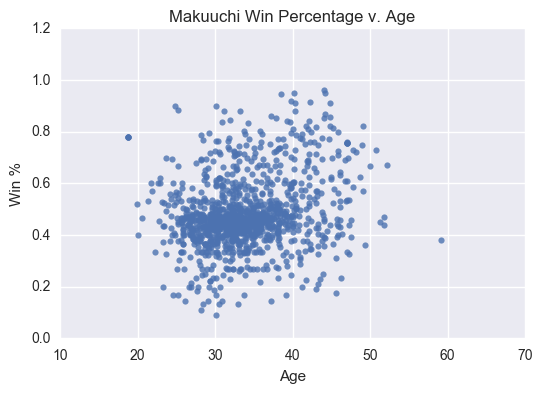

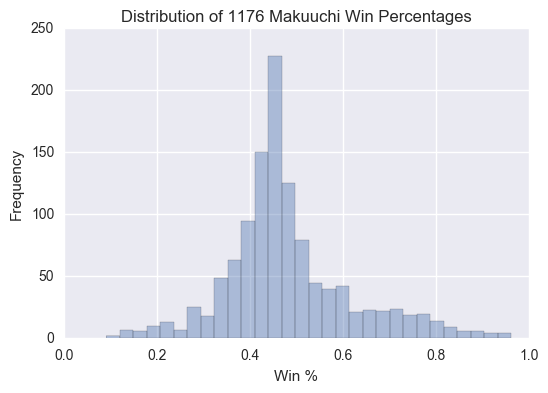

In [18]:
age = filtered_df['age']
makuuchi_wins = filtered_df['makuuchi_record'].map(lambda x: x['wins'])
makuuchi_losses = filtered_df['makuuchi_record'].map(lambda x: x['losses'])
makuuchi_wp = makuuchi_wins/(makuuchi_wins + makuuchi_losses)

data_set = pd.DataFrame({'age': age, 'makuuchi_wp': makuuchi_wp})
print "Any null values? " + str(data_set.isnull().values.any())
data_set['age'] = data_set['age'].apply(pd.to_numeric) # data_set.dtypes should now be float64's (strings --> NaN)

sns.set_style("darkgrid")
fig1 = plt.figure()
plt.title('Makuuchi Win Percentage v. Age')
ax = sns.regplot(x="age", y="makuuchi_wp", data=data_set, fit_reg=False)
ax.set(xlabel="Age", ylabel="Win %");
# fig1.savefig('plots/makuuchi_wp_vs_age.png', dpi=300)

fig2 = plt.figure()
plt.title('Distribution of ' + str(len(data_set)) + ' Makuuchi Win Percentages')
ax = sns.distplot(makuuchi_wp, kde=False, bins=30)
ax.set(xlabel="Win %", ylabel="Frequency");
# fig2.savefig('plots/makuuchi_wp_distrib.png', dpi=300)

# Why is median makuuchi wp lower than career wp's?
# - Possible that good sumos have higher win percentage in lower divisions, but perform worse in the top division
# - Can find this out by comparing pre and post top division win percentages?

### Makuuchi Win Percentage Vs. Height

In [7]:
# clean data
logical = rikishi_df['makuuchi_record'].map(lambda x: (x['wins'] != 0) & (x['wins'] is not None)) & \
            rikishi_df['makuuchi_record'].map(lambda x: (x['losses'] != 0) & (x['losses'] is not None)) & \
            rikishi_df['height'].map(lambda x: x is not None)
filtered_df = rikishi_df[logical]

Any null values? False


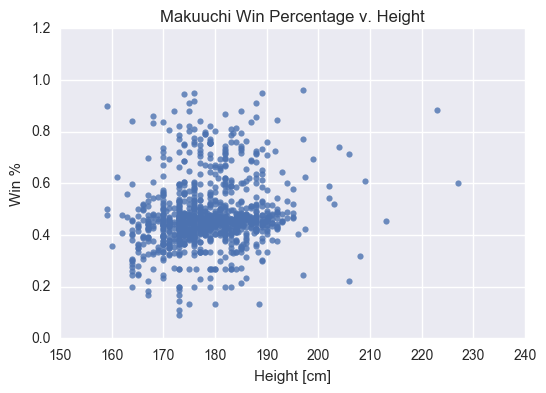

In [8]:
height = filtered_df['height']
makuuchi_wins = filtered_df['makuuchi_record'].map(lambda x: x['wins'])
makuuchi_losses = filtered_df['makuuchi_record'].map(lambda x: x['losses'])
makuuchi_wp = makuuchi_wins/(makuuchi_wins + makuuchi_losses)

data_set = pd.DataFrame({'height': height, 'makuuchi_wp': makuuchi_wp})
print "Any null values? " + str(data_set.isnull().values.any())
data_set['height'] = data_set['height'].apply(pd.to_numeric)

sns.set_style("darkgrid")
fig = plt.figure()
plt.title('Makuuchi Win Percentage v. Height')
ax = sns.regplot(x="height", y="makuuchi_wp", data=data_set, fit_reg=False)
ax.set(xlabel="Height [cm]", ylabel="Win %");
# fig.savefig('plots/makuuchi_wp_vs_height.png', dpi=300)

### Makuuuchi Win Percentage v. Weight

In [9]:
# clean data
logical = rikishi_df['makuuchi_record'].map(lambda x: (x['wins'] != 0) & (x['wins'] is not None)) & \
            rikishi_df['makuuchi_record'].map(lambda x: (x['losses'] != 0) & (x['losses'] is not None)) & \
            rikishi_df['weight'].map(lambda x: x is not None)
filtered_df = rikishi_df[logical]

Any null values? False


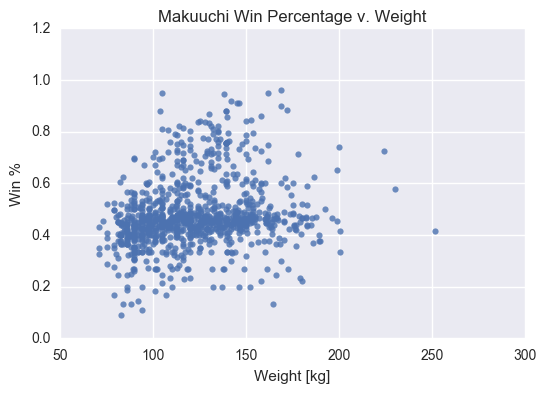

In [10]:
weight = filtered_df['weight']
makuuchi_wins = filtered_df['makuuchi_record'].map(lambda x: x['wins'])
makuuchi_losses = filtered_df['makuuchi_record'].map(lambda x: x['losses'])
makuuchi_wp = makuuchi_wins/(makuuchi_wins + makuuchi_losses)

data_set = pd.DataFrame({'weight': weight, 'makuuchi_wp': makuuchi_wp})
print "Any null values? " + str(data_set.isnull().values.any())
data_set['weight'] = data_set['weight'].apply(pd.to_numeric)

sns.set_style("darkgrid")
fig = plt.figure()
plt.title('Makuuchi Win Percentage v. Weight')
ax = sns.regplot(x="weight", y="makuuchi_wp", data=data_set, fit_reg=False)
ax.set(xlabel="Weight [kg]", ylabel="Win %");
# fig.savefig('plots/makuuchi_wp_vs_weight.png', dpi=300)

### Makuuchi Win Percentage v. Highest Rank

In [11]:
# clean data
logical = rikishi_df['makuuchi_record'].map(lambda x: (x['wins'] != 0) & (x['wins'] is not None)) & \
            rikishi_df['makuuchi_record'].map(lambda x: (x['losses'] != 0) & (x['losses'] is not None)) & \
            rikishi_df['highest_rank'].map(lambda x: x is not None) & \
            rikishi_df['highest_rank'].map(lambda x: (x == u'Yokozuna') | (x == u'Ozeki') | \
                              (x == u'Sekiwake') | (x == u'Komusubi') | (u'Maegashira' in x))

# order of filtering here matters, tried to get as even a Maegashira split as possible (238, 292, 248)
filtered_df = rikishi_df[logical]
filtered_df = filtered_df.replace(to_replace = '^Maegashira\s[1-2]$', value = 'Maegashira (1-2)', regex=True)
filtered_df = filtered_df.replace(to_replace = '^Maegashira\s[3-7]$', value = 'Maegashira (3-7)', regex=True)
filtered_df = filtered_df.replace(to_replace = '^Maegashira\s\d{1,2}$', value = 'Maegashira (8+)', regex=True)
filtered_df.head()

,rikishi_ID,shikona,highest_rank,bday,age,birth_place,height,weight,sumo_stable,active_years,debut,entry_rank,retirement,career_record,makuuchi_record,yokozuna_record,ozeki_record,sekiwake_record,komusubi_record,maegashira_record,juryo_record,makushita_record,sandanme_record,jonidan_record,jonokuchi_record
10,10,Yukimiyama Kendayu - Yukimiyama Tetsuemon,Ozeki,NaT,NaN,"Saga-ken, Tosu-shi",NaN,NaN,Takeshima,19.498973,1757-10-01 00:00:00,Ozeki,1777-04-01 00:00:00,"{u'kinboshi': None, u'wins': 76, u'appearances...","{u'kinboshi': None, u'wins': 76, u'appearances...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 0, u'appearances'...","{u'kinboshi': None, u'wins': 5, u'appearances'...","{u'kinboshi': None, u'wins': 26, u'appearances...","{u'kinboshi': None, u'wins': 45, u'appearances...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc..."
11,11,Shirakawa Sekiemon - Shirakawa Shigaemon,Ozeki,NaT,NaN,"Akita-ken, Hiraka-gun",194.0,153.0,Isenoumi,12.000000,1757-10-01 00:00:00,Ozeki,1769-10-01 00:00:00,"{u'kinboshi': None, u'wins': 62, u'appearances...","{u'kinboshi': None, u'wins': 21, u'appearances...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 0, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 21, u'appearances...","{u'kinboshi': None, u'wins': 41, u'appearances...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc..."
16,16,Tegarayama Jindayu,Komusubi,NaT,NaN,Fukuoka-ken,NaN,NaN,Takeshima,4.413415,1757-10-01 00:00:00,Maegashira,1762-03-01 00:00:00,"{u'kinboshi': None, u'wins': 2, u'appearances'...","{u'kinboshi': None, u'wins': 2, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 2, u'appearances'...","{u'kinboshi': None, u'wins': 0, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc..."
20,20,Shiranui Mitsuemon,Maegashira (3-7),NaT,NaN,Kumamoto-ken,NaN,NaN,Takeshima,4.413415,1757-10-01 00:00:00,Maegashira,1762-03-01 00:00:00,"{u'kinboshi': None, u'wins': 4, u'appearances'...","{u'kinboshi': None, u'wins': 4, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 4, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc..."
25,25,Yatsuhashi Sawaemon - Yatsuhashi Seidayu,Maegashira (3-7),NaT,NaN,Edo,NaN,NaN,Kasugayama,7.000684,1757-10-01 00:00:00,Maegashira,1764-10-01 00:00:00,"{u'kinboshi': None, u'wins': 4, u'appearances'...","{u'kinboshi': None, u'wins': 2, u'appearances'...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': None, u'appearanc...","{u'kinboshi': None, u'wins': 2, u'appearances'...","{u'kinboshi': None, u'wins': 2, u'appearances'...","{u'kinboshi': None, u'wins': Non

Any null values? False


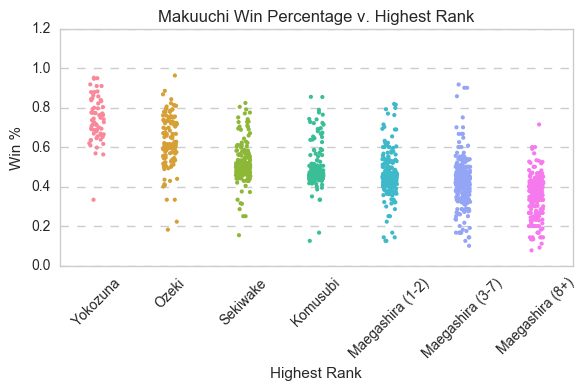

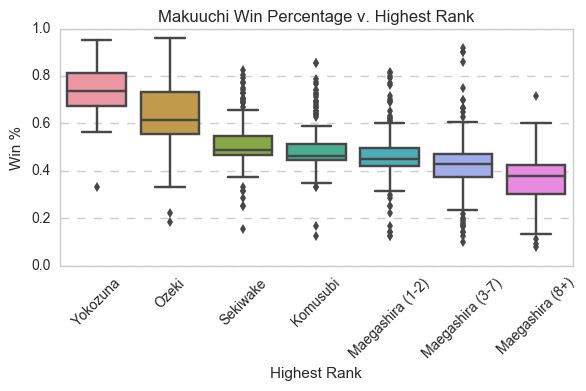

In [12]:
highest_rank = filtered_df['highest_rank']
Yokozuna = filtered_df['highest_rank'].map(lambda x: x == 'Yokozuna')
Ozeki = filtered_df['highest_rank'].map(lambda x: x == 'Ozeki')
Sekiwake = filtered_df['highest_rank'].map(lambda x: x == 'Sekiwake')
Komusubi = filtered_df['highest_rank'].map(lambda x: x == 'Komusubi')
Maegashira = filtered_df['highest_rank'].map(lambda x: x == 'Maegashira')

makuuchi_wins = filtered_df['makuuchi_record'].map(lambda x: x['wins'])
makuuchi_losses = filtered_df['makuuchi_record'].map(lambda x: x['losses'])
makuuchi_wp = makuuchi_wins/(makuuchi_wins + makuuchi_losses)

data_set = pd.DataFrame({'highest_rank': highest_rank, 'makuuchi_wp': makuuchi_wp})
# data_set = pd.DataFrame({'Yokozuna': Yokozuna, 'Ozeki': Ozeki, 'Sekiwake': Sekiwake, 'Komusubi': Komusubi, \
#                          'Maegashira': Maegashira, 'makuuchi_wp': makuuchi_wp})
print "Any null values? " + str(data_set.isnull().values.any())
# no need to convert data types - pandas objects are Python native strings

sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig1 = plt.figure()
plt.title('Makuuchi Win Percentage v. Highest Rank')
ax = sns.stripplot(x="highest_rank", y="makuuchi_wp", data=data_set, jitter=True, size=3, \
              order = ['Yokozuna', 'Ozeki', 'Sekiwake', 'Komusubi', \
                       'Maegashira (1-2)', 'Maegashira (3-7)', 'Maegashira (8+)'])
plt.xticks(rotation=45)
plt.tight_layout()
ax.set(xlabel="Highest Rank", ylabel="Win %");
# fig1.savefig('plots/wp_vs_rank.png', dpi=300)

fig2 = plt.figure()
plt.title('Makuuchi Win Percentage v. Highest Rank')
ax = sns.boxplot(x="highest_rank", y="makuuchi_wp", data=data_set, \
              order = ['Yokozuna', 'Ozeki', 'Sekiwake', 'Komusubi', \
                       'Maegashira (1-2)', 'Maegashira (3-7)', 'Maegashira (8+)'])
plt.xticks(rotation=45)
plt.tight_layout()
ax.set(xlabel="Highest Rank", ylabel="Win %");
# fig2.savefig('plots/wp_vs_rank_box.png', dpi=300)

# shows that average makuuchi win percentage does increase with rank, though there is great spread in each rank
# yokozuna shows the least spread of win percentage
# some categories, e.g. sekiwake & komusubi, have above average performers, are those people who are getting
# promoted quickly?

### Makuuchi Record v. Number of Active Years

In [13]:
# sns.set_style(style='darkgrid')
# clean data
logical = rikishi_df['makuuchi_record'].map(lambda x: (x['wins'] != 0) & (x['wins'] is not None)) & \
            rikishi_df['makuuchi_record'].map(lambda x: (x['losses'] != 0) & (x['losses'] is not None)) & \
            rikishi_df['active_years'].map(lambda x: x is not None)
filtered_df = rikishi_df[logical]

Any null values? False


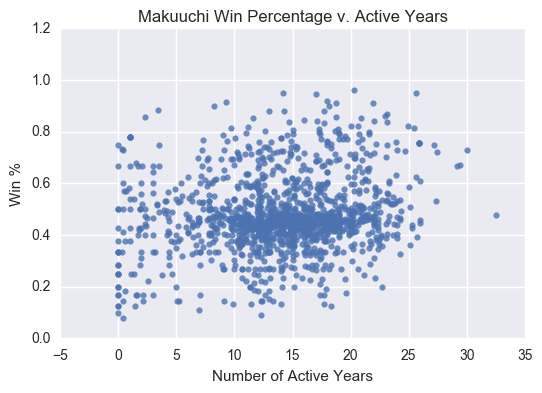

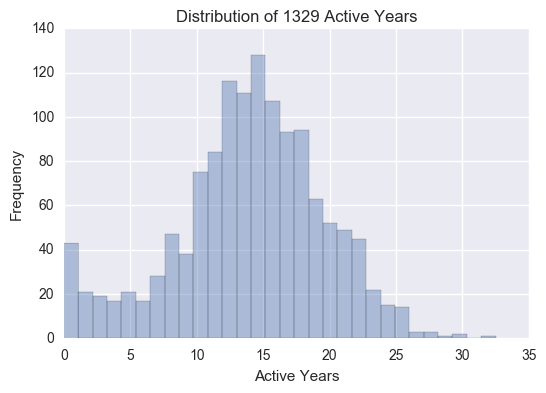

In [15]:
active_years = filtered_df['active_years']
makuuchi_wins = filtered_df['makuuchi_record'].map(lambda x: x['wins'])
makuuchi_losses = filtered_df['makuuchi_record'].map(lambda x: x['losses'])
makuuchi_wp = makuuchi_wins/(makuuchi_wins + makuuchi_losses)

data_set = pd.DataFrame({'active_years': active_years, 'makuuchi_wp': makuuchi_wp})
print "Any null values? " + str(data_set.isnull().values.any())
data_set['active_years'] = data_set['active_years'].apply(pd.to_numeric)

sns.set_style("darkgrid")
fig1 = plt.figure()
plt.title('Makuuchi Win Percentage v. Active Years')
ax = sns.regplot(x="active_years", y="makuuchi_wp", data=data_set, fit_reg=False)
ax.set(xlabel="Number of Active Years", ylabel="Win %");
# fig1.savefig('plots/makuuchi_wp_vs_active_years.png', dpi=300)

fig2 = plt.figure()
plt.title('Distribution of ' + str(len(data_set)) + ' Active Years')
ax = sns.distplot(active_years, kde=False, bins=30)
ax.set(xlabel="Active Years", ylabel="Frequency");
# fig2.savefig('plots/active_years_distrib.png', dpi=300)

### Career Win Percentage v. Age

In [19]:
# clean data
logical = rikishi_df['career_record'].map(lambda x: (x['wins'] != 0) & (x['wins'] is not None)) & \
            rikishi_df['career_record'].map(lambda x: (x['losses'] != 0) & (x['losses'] is not None)) & \
            rikishi_df['age'].map(lambda x: (x is not None) & (x > 10))
filtered_df = rikishi_df[logical]

Any null values? False


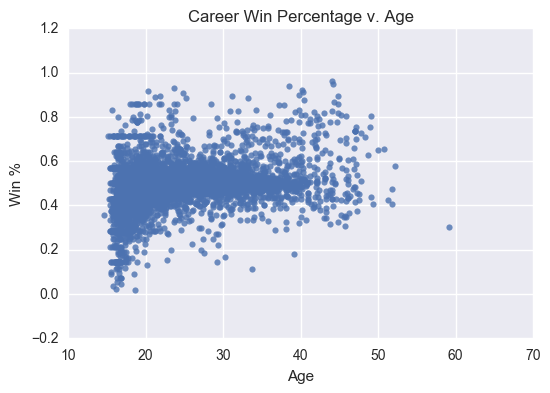

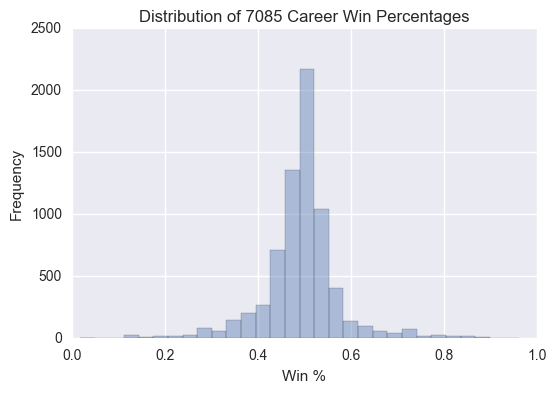

In [20]:
# visualize
# how do the current yokozuna compare? wins, losses, win/loss ratios, withdrawals

age = filtered_df['age']
career_wins = filtered_df['career_record'].map(lambda x: x['wins'])
career_losses = filtered_df['career_record'].map(lambda x: x['losses'])
career_wp = career_wins/(career_wins + career_losses)

data_set = pd.DataFrame({'age': age, 'career_wp': career_wp})
print "Any null values? " + str(data_set.isnull().values.any())
data_set['age'] = data_set['age'].apply(pd.to_numeric)

sns.set_style("darkgrid")
fig1 = plt.figure()
plt.title('Career Win Percentage v. Age')
ax = sns.regplot(x="age", y="career_wp", data=data_set, fit_reg=False)
ax.set(xlabel="Age", ylabel="Win %");
# fig1.savefig('plots/career_wp_vs_age.png', dpi=300)

fig2 = plt.figure()
plt.title('Distribution of ' + str(len(data_set)) + ' Career Win Percentages')
ax = sns.distplot(career_wp, kde=False, bins=30)
ax.set(xlabel="Win %", ylabel="Frequency");
# fig2.savefig('plots/career_wp_distrib.png', dpi=300)

# the older the sumo, the more wins under the rikishi's belt
# some sumos are much more successful than others, which begins to show in the late 20s (check this)
# 
# median (typical) distribution of all win percentages falls around 0.5
# class of older sumos have higher win percentages (get better? or bad sumos retire early?)
# make animation of distribution over time?

In [52]:
# from bokeh.plotting import figure, show
# from bokeh.charts import Scatter, output_notebook

# p = Scatter(data_set, x='age', y='career_wp', title="Career Win Percentage v. Age", xlabel="Age", ylabel="Win %")

# output_notebook()

# show(p)

## Success by Sumo Stable

### Success by Number of Makuuchi Level Rikishi

In [21]:
# How to Measure Heya Stable Success?
# by number of makuuchi-level sumo
# by number of Makuuchi tournament wins (yusho)

logical = rikishi_df['sumo_stable'].map(lambda x: x is not None) & \
            rikishi_df['highest_rank'].map(lambda x: x is not None)

filtered_df = rikishi_df[logical]
filtered_df = filtered_df.replace(to_replace='^Maegashira\s\d+$', value='Maegashira', regex=True)

def last_stable(stable): # fxn for extracting most recent sumo stable
    if '-' in stable:
        parse_list = stable.split(' - ') # if just 1 item, will return list with that item
        recent_stable = parse_list[len(parse_list)-1]
    else:
        recent_stable = stable
    return recent_stable

# using .loc to assign new values avoids chained indexing problems
# pandas cannot guarantee whether a value is set to ORIGINAL df or a COPY of the df
filtered_df.loc[:,'sumo_stable'] = filtered_df['sumo_stable'].apply(last_stable)
# filtered_df['sumo_stable'].unique()

In [22]:
grouped_df = filtered_df.groupby(by='sumo_stable')

data_rows = [] # initialize list of dicts
makuuchi_ranks = [u'Yokozuna', u'Ozeki', u'Sekiwake', u'Komusubi', u'Maegashira'] # makuuchi division ranks

# for each group, count number of makuuchi division sumos
for name, group in grouped_df:
    count = 0
    data_dict = {}
    for _, row in group.iterrows():
        if any(rank in row['highest_rank'] for rank in makuuchi_ranks):
            count += 1
    data_dict.update({'sumo_stable': name, 'makuuchi_sumos': count})
    data_rows.append(data_dict)

data_set = pd.DataFrame(data_rows, columns={'sumo_stable', 'makuuchi_sumos'})
data_set = data_set.sort_values(by='makuuchi_sumos', ascending=False) # sort by success

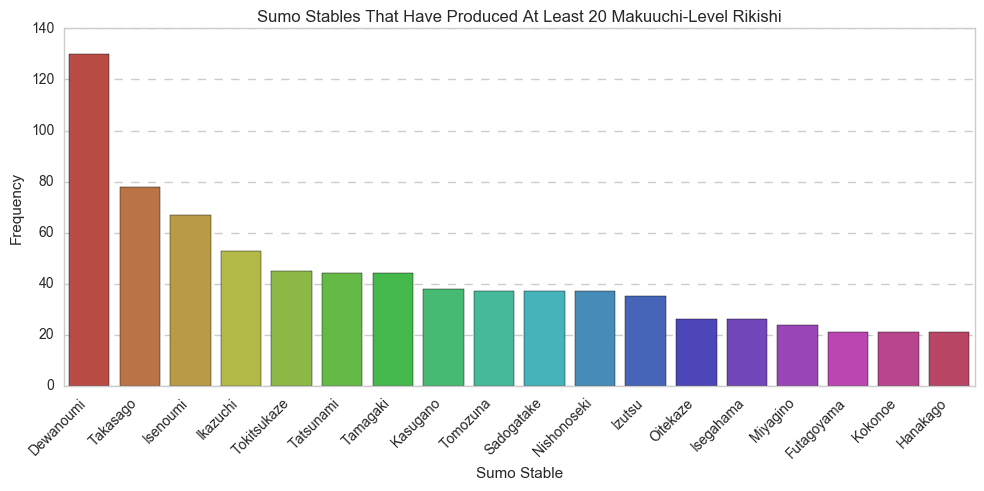

In [23]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig = plt.figure()
fig.set_size_inches(10, 5)
plt.title('Sumo Stables That Have Produced At Least 20 Makuuchi-Level Rikishi')
ax = sns.barplot(x="sumo_stable", y="makuuchi_sumos", \
                   data=data_set[data_set['makuuchi_sumos'] > 20], \
                    palette=sns.hls_palette(18, l=.5, s=.6))
plt.xticks(rotation=45)
plt.tight_layout()
ax.set(xlabel="Sumo Stable", ylabel="Frequency");

for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment('right')
    
# fig.savefig('plots/heya_success_by_makuuchi.png', dpi=300)

# compare these to the publically available info on these stables?

### Success by Makuuchi Win Percentage

In [21]:
logical = rikishi_df['makuuchi_record'].map(lambda x: (x['wins'] != 0) & (x['wins'] is not None)) & \
            rikishi_df['makuuchi_record'].map(lambda x: (x['losses'] != 0) & (x['losses'] is not None)) & \
            rikishi_df['sumo_stable'].map(lambda x: x is not None)
        
filtered_df = rikishi_df[logical]

def last_stable(stable): # fxn for extracting most recent sumo stable
    if '-' in stable:
        parse_list = stable.split(' - ') # if just 1 item, will return list with that item
        recent_stable = parse_list[len(parse_list)-1]
    else:
        recent_stable = stable
    return recent_stable

# using .loc to assign new values avoids chained indexing problems
# pandas cannot guarantee whether a value is set to ORIGINAL df or a COPY of the df
filtered_df.loc[:,'sumo_stable'] = filtered_df['sumo_stable'].apply(last_stable)
# filtered_df['sumo_stable'].unique()

/Users/vincentchow/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
grouped_df = filtered_df.groupby(by='sumo_stable')

data_rows = []
# for each group, determine win percentage
for name, group in grouped_df:
    data_dict = {}
    makuuchi_wins = group['makuuchi_record'].map(lambda x: x['wins'])
    makuuchi_losses = group['makuuchi_record'].map(lambda x: x['losses'])
    makuuchi_wp = makuuchi_wins/(makuuchi_wins + makuuchi_losses)
    average_wp = makuuchi_wp.mean()
    std_wp = makuuchi_wp.std()
    data_dict.update({'sumo_stable': name, 'average_wp': average_wp, 'std_wp': std_wp, \
                        'rikishi_count': len(group)})
    data_rows.append(data_dict)

data_set = pd.DataFrame(data_rows, columns={'sumo_stable', 'average_wp', \
                                            'std_wp', 'rikishi_count'})
data_set = data_set.sort_values(by='average_wp', ascending=False) # sort by success

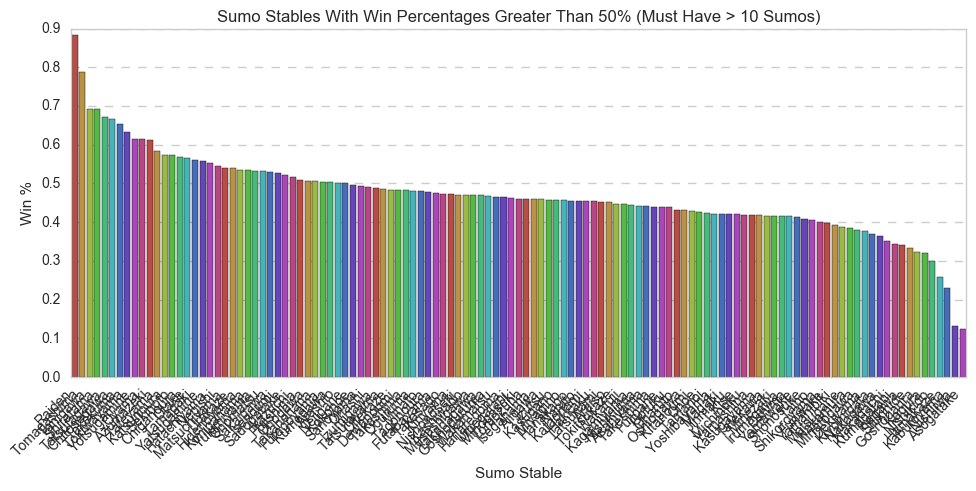

In [23]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig = plt.figure()
fig.set_size_inches(10, 5)
plt.title('Sumo Stables With Win Percentages Greater Than 50% (Must Have > 10 Sumos)')
ax = sns.barplot(x="sumo_stable", y="average_wp", \
         palette=sns.hls_palette(10, l=.5, s=.6), \
         data=data_set)
# data_set[(data_set['average_wp'] > 0.5) & (data_set['rikishi_count'] > 10)]
plt.xticks(rotation=45)
plt.tight_layout()
ax.set(xlabel="Sumo Stable", ylabel="Win %");

for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment('right')
    
# fig.savefig('plots/heya_success_by_wp.png', dpi=300)
# Plots sumo stables that have at least 10 makuuchi level sumos with an average wp > 50% 
# makes sense that not much is learned here, we already knew taht win percentage is 
# always close to 50%

# plot needs work: what is better way to present this?
# not surprising that win percentages are still ~ 50%